In [1]:
# Importing required libraries
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.2.0-rc3


In [2]:
# Importing the Model
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

In [3]:
# Freezing layers for Fine Tuning
for layer in model.layers:
	layer.trainable = False

In [4]:
# Manipulating layers for custom classes
x = model.output
x = tf.keras.layers.Flatten(name='flatten')(x)
x = tf.keras.layers.Dense(1024, activation=tf.nn.relu, name='fc1')(x)
x = tf.keras.layers.Dropout(0.5, name='drop1')(x)
x = tf.keras.layers.Dense(1024, activation=tf.nn.relu, name='fc2')(x)
x = tf.keras.layers.Dropout(0.5, name='drop2')(x)
x = tf.keras.layers.Dense(5, activation=tf.nn.softmax, name='predictions')(x)
custom_model = tf.keras.Model(inputs=model.input, outputs=x)

In [5]:
# Visualizing Model Summary
custom_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# Visualizing Model Architecture
# tf.keras.utils.plot_model(custom_model,'model.png')

In [7]:
# Preparing Training, Validation and Testing Data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory('/home/bhaven/Downloads/dataset/resized_green_hundred', batch_size=64, target_size=(224, 224), class_mode='sparse', subset='training', shuffle=True)
validation_generator = train_datagen.flow_from_directory('/home/bhaven/Downloads/dataset/resized_green_hundred', batch_size=64, target_size=(224, 224), class_mode='sparse', subset='validation', shuffle=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/home/bhaven/Downloads/dataset/resized_green_test', batch_size=64, target_size=(224,224), class_mode ='sparse', shuffle=True)

Found 103236 images belonging to 5 classes.
Found 25809 images belonging to 5 classes.
Found 53576 images belonging to 5 classes.


In [8]:
# Compiling the Model
custom_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(name='sparse_categorical_crossentropy'), optimizer=tf.keras.optimizers.Adam(learning_rate=.00001, name='Adam'), metrics=['accuracy'])

In [9]:
# # Saving Model Checkpoints
# checkpoint_path = "training_1/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=0, save_best_only=False,
#     save_weights_only=False, mode='auto', save_freq='epoch')

In [10]:
# Training the Model
history = custom_model.fit(train_generator, epochs=50, validation_data=validation_generator, steps_per_epoch=train_generator.samples//train_generator.batch_size, validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/50
1613/1613 [==============================] - 1962s 1s/step - loss: 1.3831 - accuracy: 0.4030 - val_loss: 1.2033 - val_accuracy: 0.5066
Epoch 2/50
1613/1613 [==============================] - 1364s 846ms/step - loss: 1.2058 - accuracy: 0.4932 - val_loss: 1.1067 - val_accuracy: 0.5528
Epoch 3/50
1613/1613 [==============================] - 1314s 814ms/step - loss: 1.1289 - accuracy: 0.5328 - val_loss: 1.0613 - val_accuracy: 0.5641
Epoch 4/50
1613/1613 [==============================] - 1317s 817ms/step - loss: 1.0757 - accuracy: 0.5569 - val_loss: 1.0050 - val_accuracy: 0.5970
Epoch 5/50
1613/1613 [==============================] - 1349s 836ms/step - loss: 1.0300 - accuracy: 0.5789 - val_loss: 0.9718 - val_accuracy: 0.6118
Epoch 6/50
1613/1613 [==============================] - 1352s 838ms/step - loss: 0.9905 - accuracy: 0.5977 - val_loss: 0.9233 - val_accuracy: 0.6308
Epoch 7/50
1613/1613 [==============================] - 1348s 836ms/step - loss: 0.9509 - accuracy: 0.6175 - 

In [11]:
# Calculating Model Test Score
score = custom_model.evaluate(test_generator, verbose=1, steps=test_generator.samples//test_generator.batch_size)
print('Test accuracy:', 100*score[1])
print('\nTest loss:', score[0])

837/837 [==============================] - 938s 1s/step - loss: 0.9298 - accuracy: 0.7255
Test accuracy: 72.55451083183289

Test loss: 0.9298326969146729


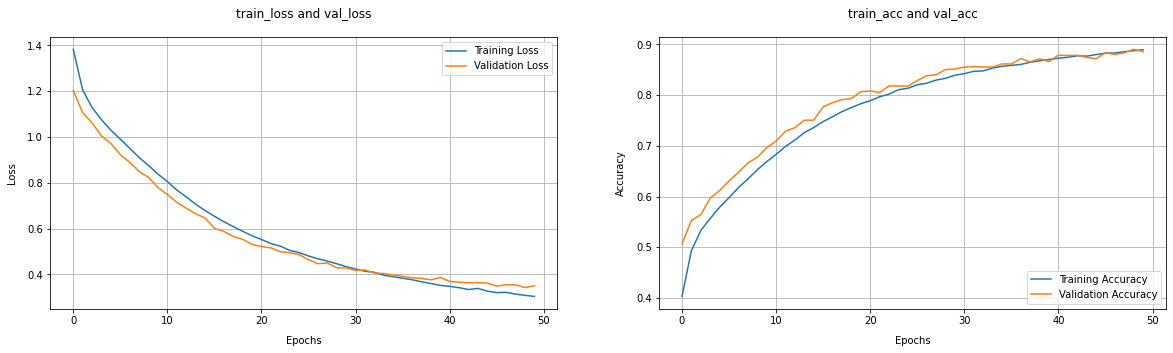

In [12]:
# Visualizing Training and Test attributes
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(train_loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.ylabel('Loss',labelpad=10)
plt.xlabel('Epochs',labelpad=10)
plt.title('train_loss and val_loss',pad=20)
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.ylabel('Accuracy',labelpad=10)
plt.xlabel('Epochs',labelpad=10)
plt.title('train_acc and val_acc',pad=20)
plt.legend(loc='lower right')
plt.grid(True)

In [13]:
# Saving Model
custom_model.save('/home/bhaven/Downloads/Models/diabetic.h5')

# architecture to JSON, weights to HDF5
custom_model.save_weights('/home/bhaven/Downloads/Models/weights.h5')
with open('/home/bhaven/Downloads/Models/architecture.json', 'w') as f:
        f.write(custom_model.to_json())

In [14]:
# Loading Saved Model
# architecture and weights from HDF5
model = tf.keras.models.load_model('/home/bhaven/Downloads/Models/diabetic.h5')
# architecture from JSON, weights from HDF5
with open('/home/bhaven/Downloads/Models/architecture.json') as f:
    model = tf.keras.models.model_from_json(f.read())
model.load_weights('/home/bhaven/Downloads/Models/weights.h5')

In [15]:
# Getting test batch and label batch
for image_batch, label_batch in test_generator:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break
# label_batch.astype(int)

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64,)


In [16]:
# Predicting test batch
prediction = custom_model.predict(image_batch, verbose=1)
prediction.shape

2/2 [==============================] - 0s 156ms/step


(64, 5)

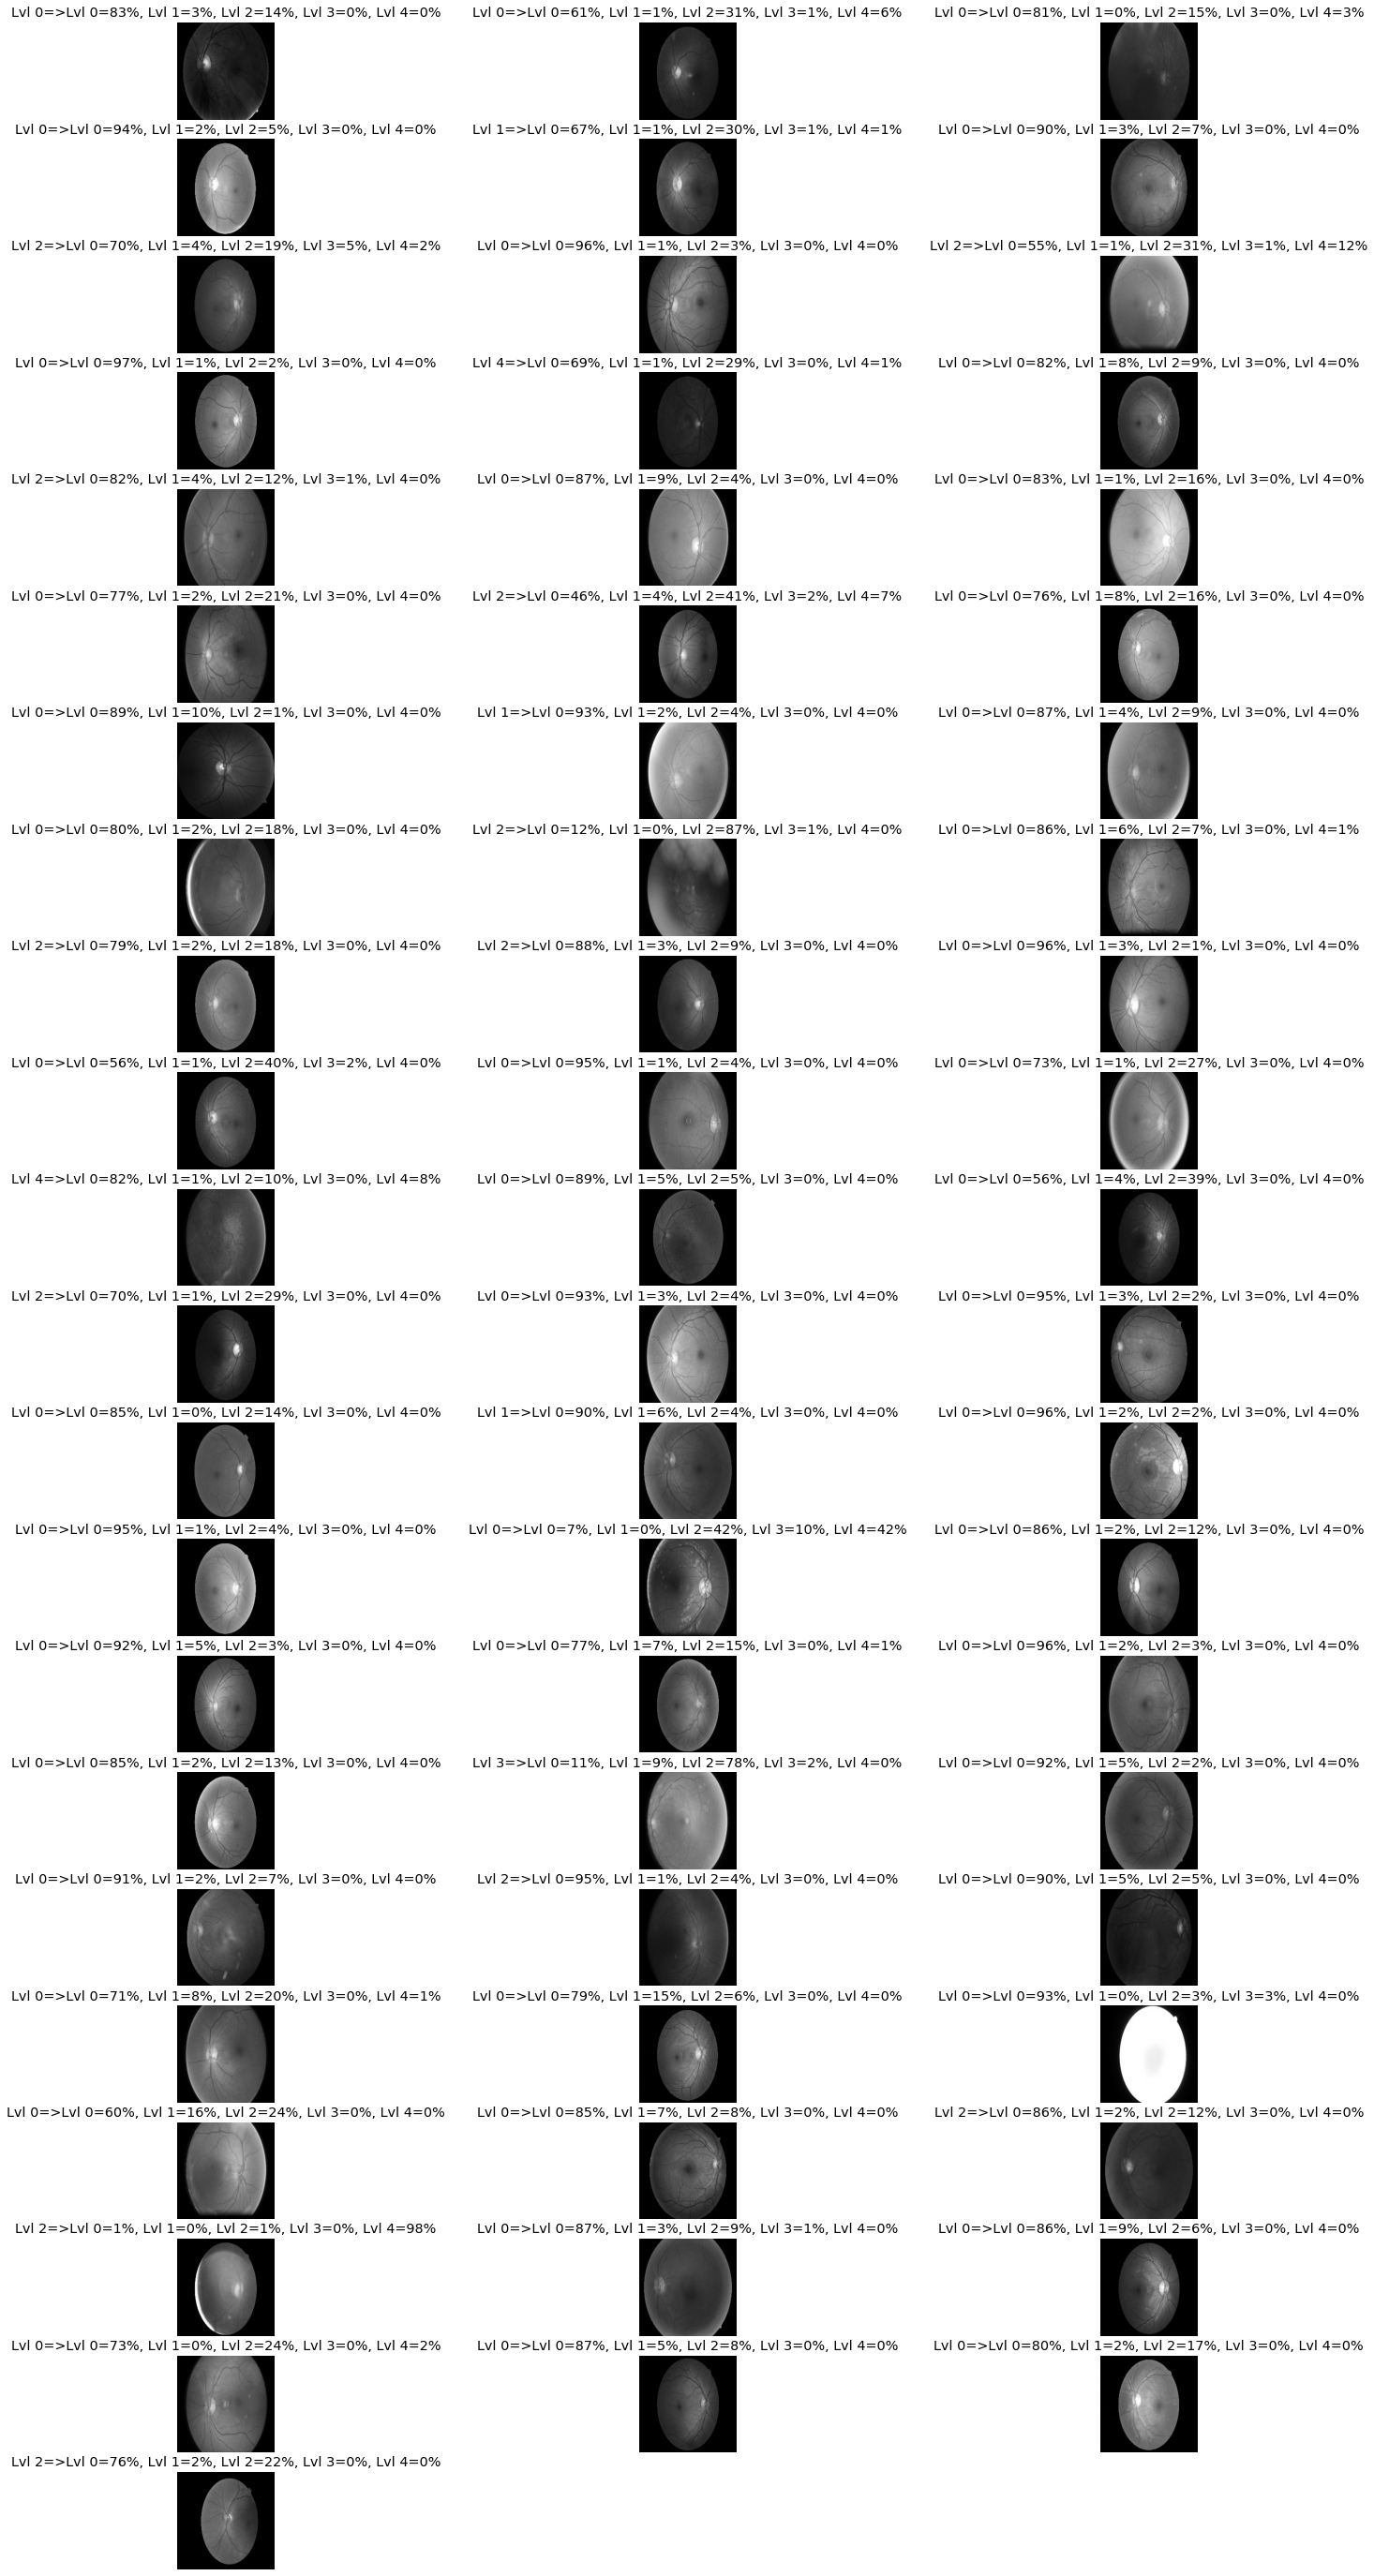

In [17]:
# Visualizing Predictions
plt.figure(figsize=(25,50))
plt.style.use('ggplot')
for n in range(test_generator.batch_size):
    ax = plt.subplot(22,3,n+1)
    plt.imshow(image_batch[n])
    plt.title("Lvl {}=>Lvl 0={:.0f}%, Lvl 1={:.0f}%, Lvl 2={:.0f}%, Lvl 3={:.0f}%, Lvl 4={:.0f}%".format(label_batch[n].astype(int),100*prediction[n,0],100*prediction[n,1],100*prediction[n,2],100*prediction[n,3],100*prediction[n,4]))
    plt.axis('off')
# plt.savefig('pred.jpeg')